In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import eig
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
usd_euro = yf.download("EURUSD=X", start='2012-1-1', end="2022-1-1")
usd_rial = yf.download("SARUSD=X", start='2012-1-1', end="2022-1-1")
usd_yuan = yf.download("CNYUSD=X", start='2012-1-1', end="2022-1-1")
btc = yf.download("BTC-USD", start='2012-1-1', end="2022-1-1")
# usa_utilization_rate = yf.download("", start='2012-1-1', end="2022-1-1")
# this data did not exist in yahoo finance and other sources needed confirmation to access them
gold = yf.download("GC=F", start='2012-1-1', end="2022-1-1")
silver = yf.download("SI=F", start='2012-1-1', end="2022-1-1")
wheat = yf.download("ZW=F", start='2012-1-1', end="2022-1-1")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:

def PCA(data):
    data = data.resample('M').sum()
    # Standardize/normalize the data
    data = data - np.mean(data, axis=0)
    # Compute the covariance matrix
    covariance_matrix = np.cov(data.T)
    # covariance_matrix = np.nan_to_num(covariance_matrix)
    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = eig(covariance_matrix)
    # Sort the eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]


    selected_eigenvectors = eigenvectors[:, :2]


    return eigenvalues, selected_eigenvectors



In [4]:
def scree_plot(eigenvalues, name):

    explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

    p = np.round(explained_variance_ratio*100, decimals=1)

    plt.bar(x=range(1, len(p)+1) ,height=p)
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.title(f'Scree Plot of {name}')
    plt.show()


In [9]:
def pca_plot(data, eigenvectors, name):
    data = data.resample('M').sum()
    # Standardize/normalize the data
    data = data - np.mean(data, axis=0)
    # Transform the data to its first two principal components
    transformed_data = np.dot(data, eigenvectors)
    
    # Plot the transformed data
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=transformed_data[:, 0], cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'PCA Plot of {name}')
    plt.colorbar(label='Classes')
    plt.show()

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


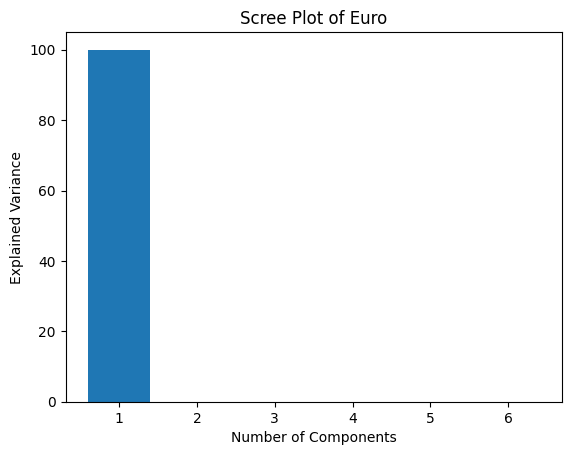

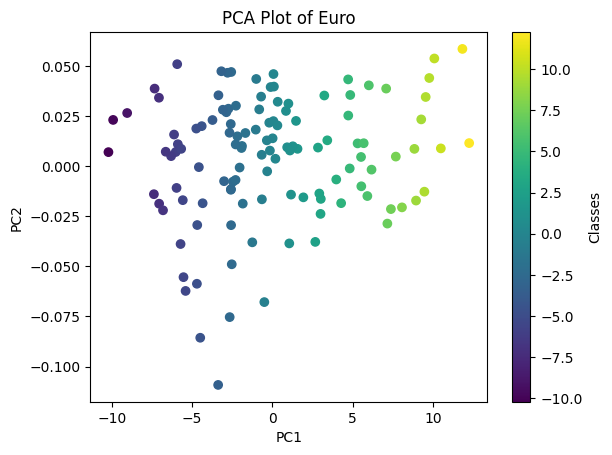

In [25]:
values, vectors = PCA(usd_euro)
scree_plot(values, "Euro")

data = usd_euro.resample('M').sum()
data = data - np.mean(data, axis=0)
transformed_data = np.dot(data, vectors)
filt = transformed_data[:, 1] < -0.5
ind =  np.where(filt)[0]
transformed_data[ind]
transformed_data = np.delete(transformed_data, ind, axis=0)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=transformed_data[:, 0], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot of Euro')
plt.colorbar(label='Classes')
plt.show()

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


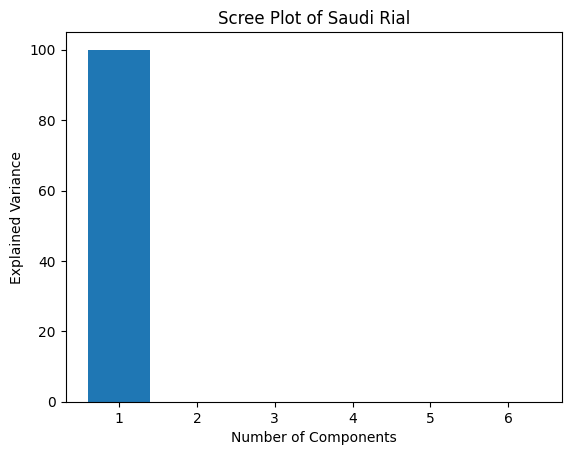

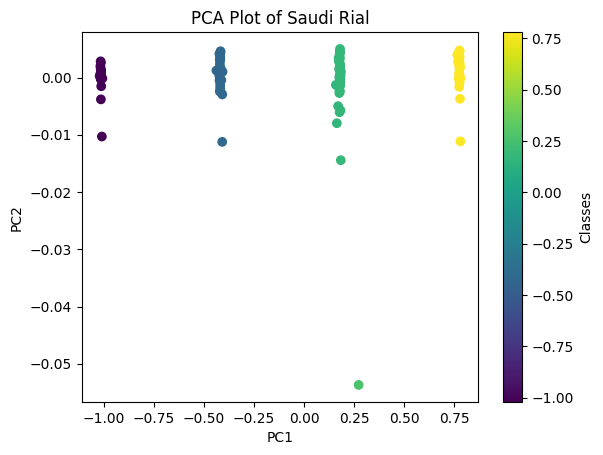

In [24]:
values, vectors = PCA(usd_rial)
scree_plot(values, "Saudi Rial")
pca_plot(usd_rial, vectors, "Saudi Rial")

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


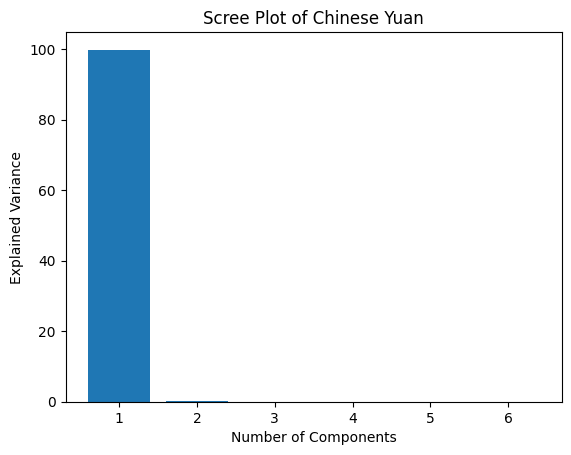

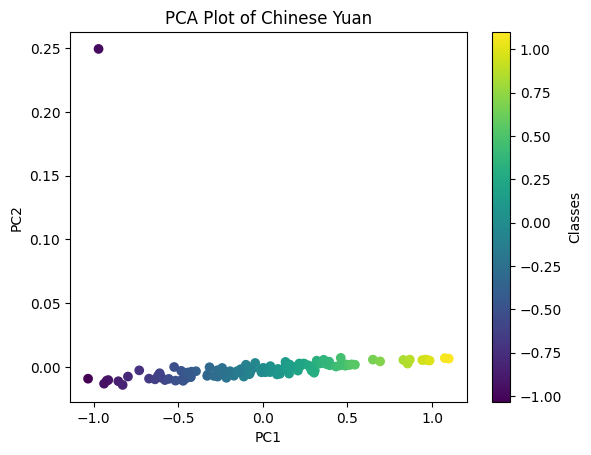

In [26]:
values, vectors = PCA(usd_yuan)
scree_plot(values, "Chinese Yuan")
pca_plot(usd_yuan, vectors, "Chinese Yuan")

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


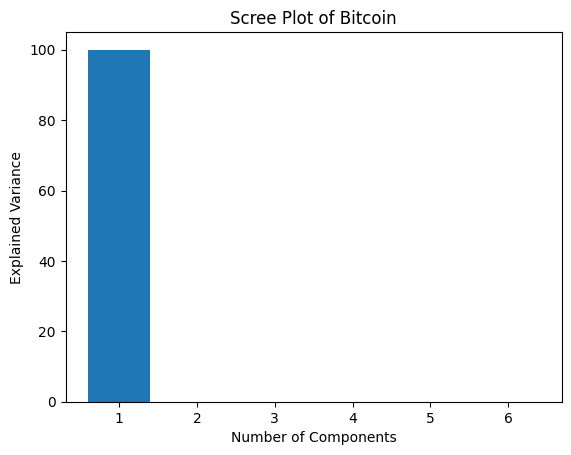

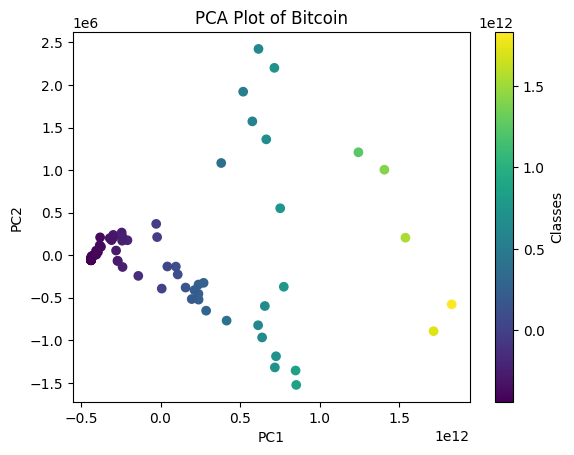

In [27]:
values, vectors = PCA(btc)
scree_plot(values, "Bitcoin")
pca_plot(btc, vectors, "Bitcoin")

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


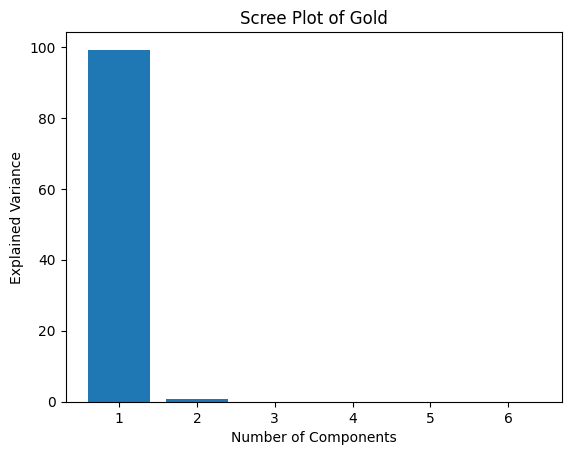

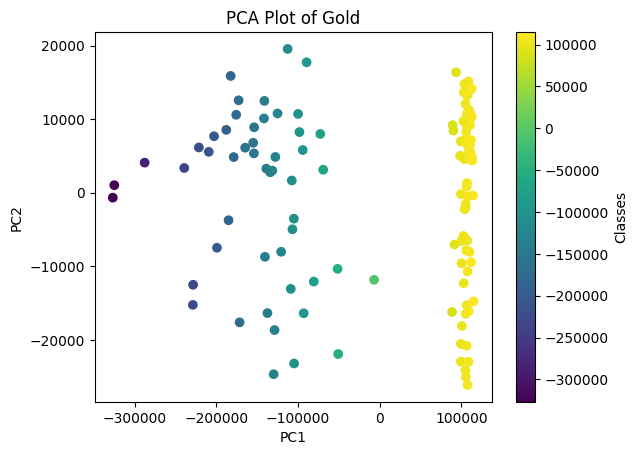

In [10]:
values, vectors = PCA(gold)
scree_plot(values, "Gold")
pca_plot(gold, vectors, "Gold")

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


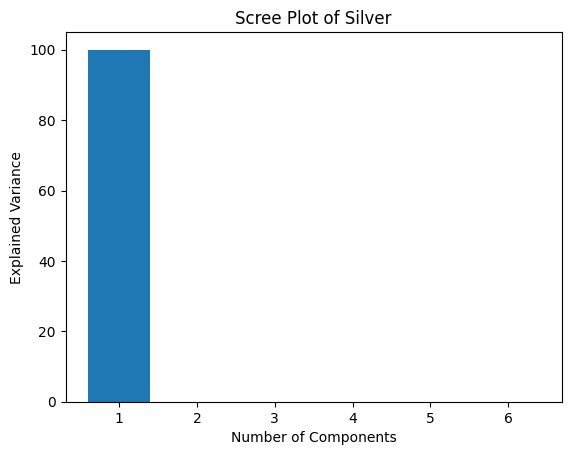

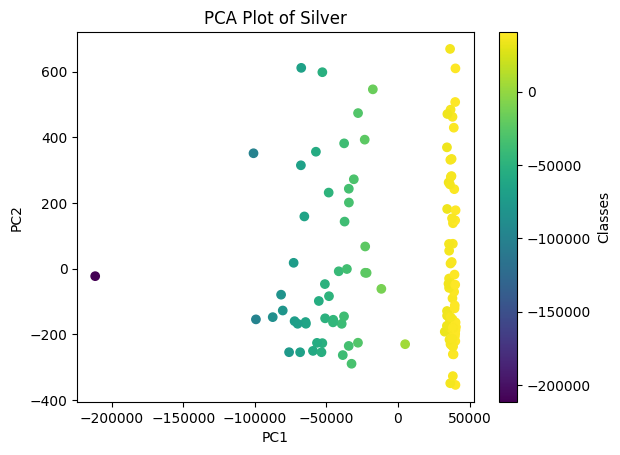

In [28]:
values, vectors = PCA(silver)
scree_plot(values, "Silver")
pca_plot(silver, vectors, "Silver")

c:\Users\win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py:762: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


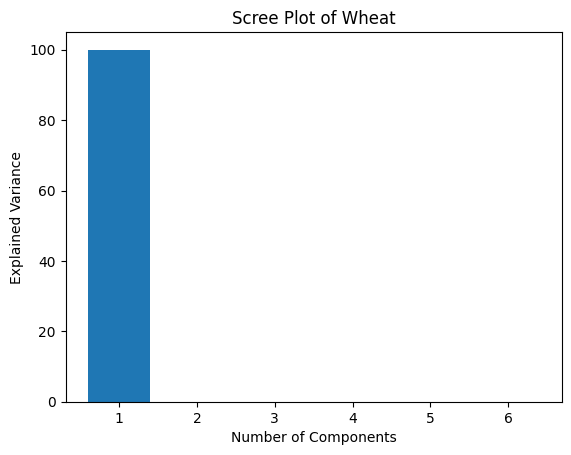

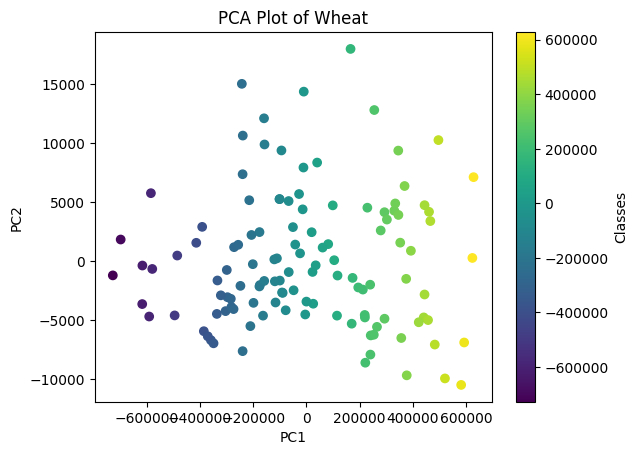

In [29]:
values, vectors = PCA(wheat)
scree_plot(values, "Wheat")
pca_plot(wheat, vectors, "Wheat")